<a href="https://colab.research.google.com/github/minghsu0107/ML/blob/master/machine-learning/bayesian_bandit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta

NUM_TRIALS = 2000
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]

In [0]:
class Bandit(object):
    def __init__(self, p):
        self.p = p
        self.a = 1
        self.b = 1

    def pull(self):
        '''generate a new trial'''
        return np.random.random() < self.p

    def sample(self):
        '''sample from the current distribution'''
        return np.random.beta(self.a, self.b)

    def update(self, x):
        self.a += x
        self.b += 1 - x

In [0]:
def plot(bandits, trial):
    x = np.linspace(0, 1, 200)
    for b in bandits:
        y = beta.pdf(x, b.a, b.b) # pdf = possibility density function
        plt.plot(x, y, label="real p: %.4f" % b.p)
    plt.title("Bandit distributions after %s trials" % trial)
    plt.legend()
    plt.show()

In [0]:
def experiment():
    bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]

    sample_points = [5,10,20,50,100,200,500,1000,1500,1999]
    for i in range(NUM_TRIALS):
        # take a sample from each bandit
        
        allsamples = [] # let's collect these just to print for debugging
        for b in bandits:
            sample = b.sample()
            allsamples.append("%.4f" % sample)
            
        if i in sample_points:
            print("current samples: %s" % allsamples)
            plot(bandits, i)

        for b in bandits:
            # pull the arm for the bandit
            new_x = b.pull() # x can be 0 or 1
            # update the distribution for the bandit whose arm we just pulled
            b.update(new_x)

current samples: ['0.0111', '0.4832', '0.9720']


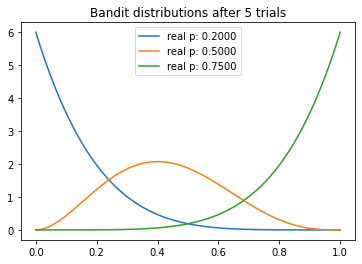

current samples: ['0.1228', '0.5710', '0.6732']


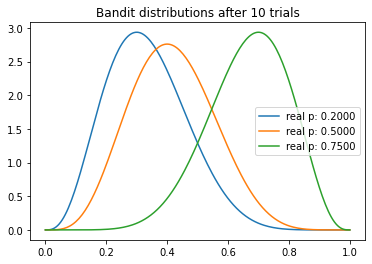

current samples: ['0.0944', '0.4367', '0.7979']


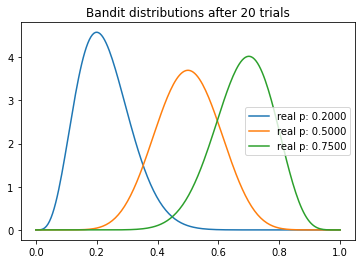

current samples: ['0.1153', '0.6813', '0.6407']


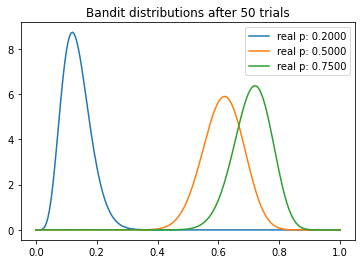

current samples: ['0.1431', '0.5523', '0.6858']


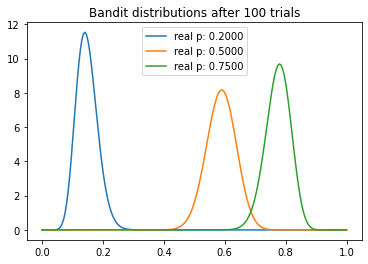

current samples: ['0.1413', '0.5457', '0.7764']


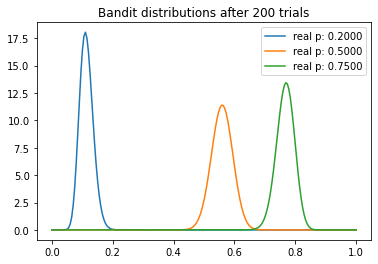

current samples: ['0.1551', '0.5014', '0.7396']


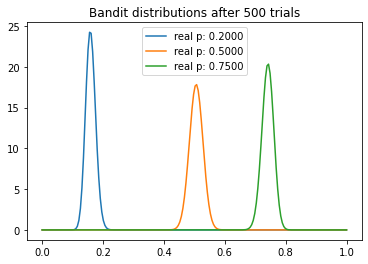

current samples: ['0.1714', '0.4989', '0.7449']


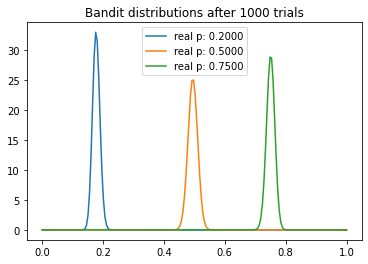

current samples: ['0.1589', '0.5024', '0.7483']


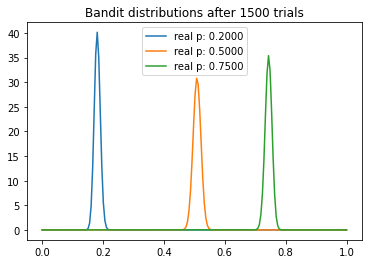

current samples: ['0.1879', '0.4987', '0.7450']


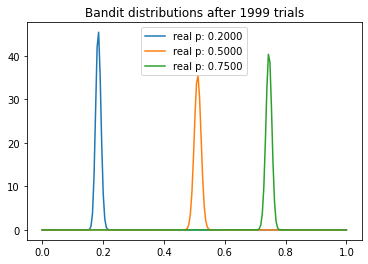

In [28]:
experiment()